# Title: Add title here
*2023 datathon and conference on Efficient Data Analysis for the Condition Assessment of Bridges*

**Author(s):** Add author name here

**Affiliation(s):** Add author affiliation here



## Abstract
Write abstract here.

## Content
Write the main body of Notebook text below this point.

### Headings and subheadings
To break your document into sections use "##" for section headings and "###" for section subheadings. 

To write *italic* text, enclose the text in "\*". 

To write **bold** text, enclose the text in "\*\*".

### Bullet points and numbered lists

- This is an example of a bullet point.
- This is another example of a bullet point.
    - This is an example of a subpoint

1. This is an example of a numbered list.
1. This continues the numbered list.
    1. This is an example of a nested list.
    1. This is a further subpoint.

### Including equations in Jupyter Notebooks
Notebooks use *LaTex* text formatting. Equations can be written inline, such as $e=mc^2$, or as seperate equation blocks as shown below.

$y = Ax+C$

### Including hyperlinks in Jupyter Notebooks
We can include hyperlinks through combinations of square and rounded brackets like [this](https://blogs.ed.ac.uk/edacab/).

### Including tables in Jupyter Notebooks
Tables use the notation shown below:

| Column 1 | Column 2 | Column 3 |
| --- | --- | --- |
| Value 1 | Description 1  | A note |
| Value 2 | Description 2  | A much longer note to demonstrate how columns expand as needed |
| Value 3 | Description 3  | A third note.|
| Value 4 | Description 4  | A further note |

### Including images in Jupyter Notebooks

To include images we upload them to the notebook and reference them using the HTML code shown below.

<div><center>
    <img src="./Example_Image.JPG" width="25%"/>
</center></div>

### Further help
For further guidance on writing Jupter Notebooks refer to [this guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) or [this summary](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).

## Adding MATLAB code to Jupyter Notebooks
To add MATLAB code to Jupyter notebooks we define a new *code block*. This block behaves like a typical MATLAB interpreter, allowing us to write functions, define variables and plot data. Two example blocks of MATLAB code are shown below. The first block of code defines a function through the special "%%file" cell decorator. The second block of code executes the cell.

In [18]:
%%file calculateSquaredValue.m
function ave = calculateSquaredValue(x)
    ave = x.^2; 
end

Created file 'C:\Users\S1879083\Documents\GitHub\EDACAB\Noteable_MATLAB_templates\calculateSquaredValue.m'.


In [32]:
input_data = 1:100;
output_data = calculateSquaredValue(input_data);
disp('The first ten output values are:')
disp(output_data(1:10))

The first ten output values are:
     1     4     9    16    25    36    49    64    81   100




Any variables or functions we have previously defined in carry over to future code blocks, as shown below.

In [33]:
disp('The first ten output values are still:')
disp(output_data(1:10))

The first ten output values are still:
     1     4     9    16    25    36    49    64    81   100




We can plot figures inline to help demonstrate relationships between variables.

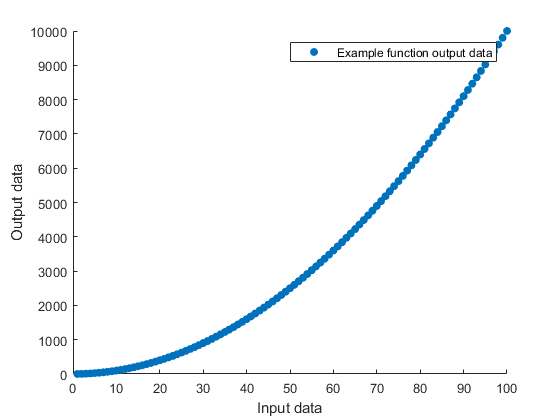

In [35]:
scatter(input_data,output_data,'filled')
xlabel('Input data')
ylabel('Output data')
legend('Example function output data')

## Accessing the shaker table data

This data is divided into four seperate datasets, each corresponding to one of the *working conditions*. The block of code below loads the data for working condition *e1*.

In [1]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/Shaker_table_data_working_condition_e1.csv";

data = readtable(url);
fs = 50;
data = renamevars(data,['Time_s_'],['Time [s]']);
disp(data.Properties.VariableNames)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
  Columns 1 through 15

    {'Var1'}    {'Time [s]'}    {'A10'}    {'A1'}    {'A2'}    {'A3'}    {'A4'}    {'A5'}    {'A6'}    {'A7'}    {'A8'}    {'A9'}    {'AY1'}    {'AY2'}    {'AY3'}

  Columns 16 through 30

    {'AY4'}    {'AY5'}    {'AY6'}    {'AY7'}    {'AZ2'}    {'AZ3'}    {'AZ4'}    {'AZ5'}    {'AZ6'}    {'AZ7'}    {'E11'}    {'E12'}    {'E13'}    {'E14'}    {'E15'}

  Columns 31 through 35

    {'E16'}    {'E17'}    {'E18'}    {'R1'}    {'R2'}




### Plotting the data
The block of code below plots all Z direction measuring points alongside their Welch power spectral density for working condition: e1.

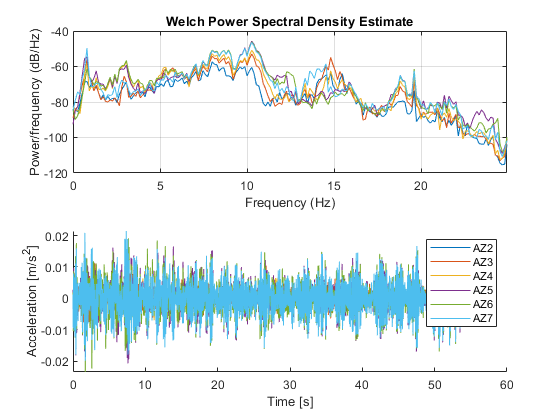

In [2]:
figure
subplot(2,1,1)
hold on
for channel = data.Properties.VariableNames
    if contains(channel,'Z')
        pwelch(data{:,channel{1}},[],floor(15*fs),floor(7.5*fs),fs);
    end
end

hold off
subplot(2,1,2)
hold on
label_list = {};
for channel = data.Properties.VariableNames
    if contains(channel,'Z')

        plot(data{:,'Time [s]'},data{:,channel{1}});
        label_list{end+1} = channel{1};
    end
end
legend(label_list)
xlabel('Time [s]')
ylabel('Acceleration [m/s^2]')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1ffcd3c-a30d-4451-8b1e-264dee75edb8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>